# Netflix Exploratory Data Analysis

In [1]:
# libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

# nlp
import spacy
from wordcloud import WordCloud

In [2]:
data = pd.read_csv('netflix_titles.csv')
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [4]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [5]:
data['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

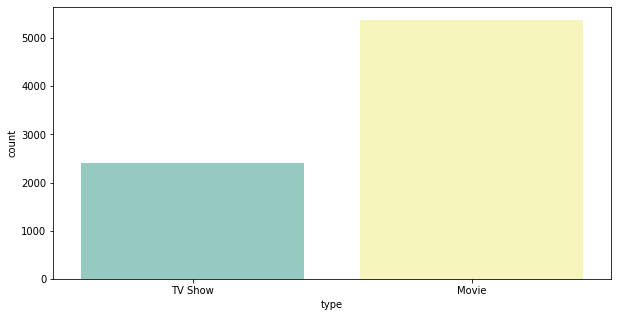

In [6]:
tv_shows = data[data['type'] == 'TV Show']
movies = data[data['type'] == 'Movie']

plt.figure(figsize=(10,5))
sns.countplot(x=data['type'], data=data,palette="Set3"); #more Movies on Netflix than TV shows

In [7]:
data['date_added'].unique()

array(['August 14, 2020', 'December 23, 2016', 'December 20, 2018', ...,
       'December 6, 2018', 'March 9, 2016', 'January 11, 2020'],
      dtype=object)

In [8]:
netflix_date = data[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x :  x.lstrip().split(' ')[0])
netflix_date['day'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[0].split(' ')[1])

In [9]:
netflix_date.head()

,date_added,year,month,day
0,"August 14, 2020",2020,August,14
1,"December 23, 2016",2016,December,23
2,"December 20, 2018",2018,December,20
3,"November 16, 2017",2017,November,16
4,"January 1, 2020",2020,January,1


In [10]:
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December'][::-1]

df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

In [11]:
df

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,,,,,
December,0.0,0.0,0.0,0.0,1.0,2.0,6.0,23.0,96.0,118.0,190.0,222.0,175.0,0.0
November,0.0,1.0,1.0,0.0,1.0,2.0,5.0,4.0,46.0,88.0,160.0,272.0,158.0,0.0
October,0.0,0.0,0.0,11.0,0.0,3.0,4.0,15.0,52.0,131.0,192.0,204.0,173.0,0.0
September,0.0,0.0,0.0,1.0,0.0,2.0,1.0,7.0,48.0,119.0,127.0,136.0,178.0,0.0
August,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,41.0,115.0,169.0,145.0,144.0,0.0
July,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,29.0,80.0,157.0,169.0,156.0,0.0
June,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,19.0,95.0,78.0,175.0,167.0,0.0
May,0.0,1.0,0.0,1.0,0.0,0.0,0.0,7.0,13.0,88.0,101.0,159.0,173.0,0.0
April,0.0,0.0,0.0,0.0,0.0,0.0,2.0,5.0,22.0,95.0,118.0,171.0,188.0,0.0


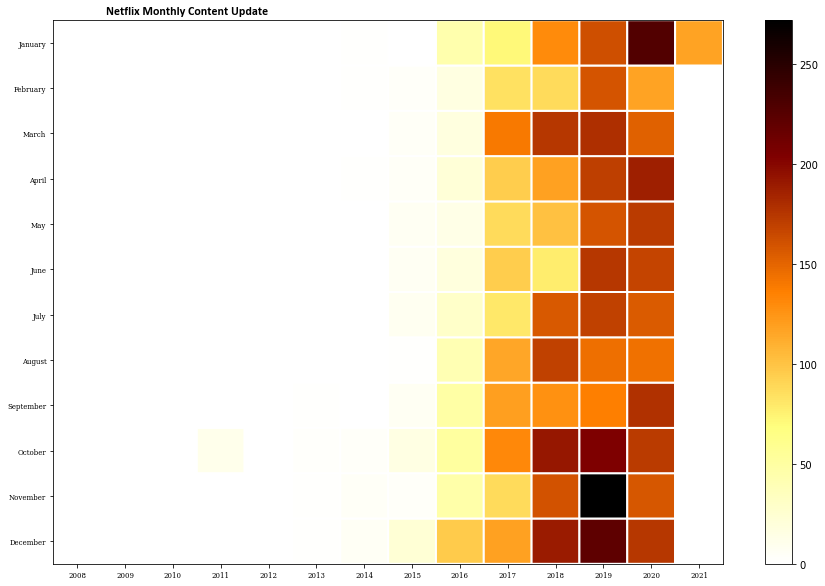

In [12]:
plt.figure(figsize=(15,10))
plt.pcolor(df, cmap='afmhot_r', edgecolors ='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5,len(df.columns),1), df.columns,fontsize=7,fontfamily='serif')
plt.yticks(np.arange(0.5,len(df.index),1), df.index,fontsize=7,fontfamily='serif')

plt.title('Netflix Monthly Content Update',fontsize=12, fontfamily='calibri', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

plt.show()

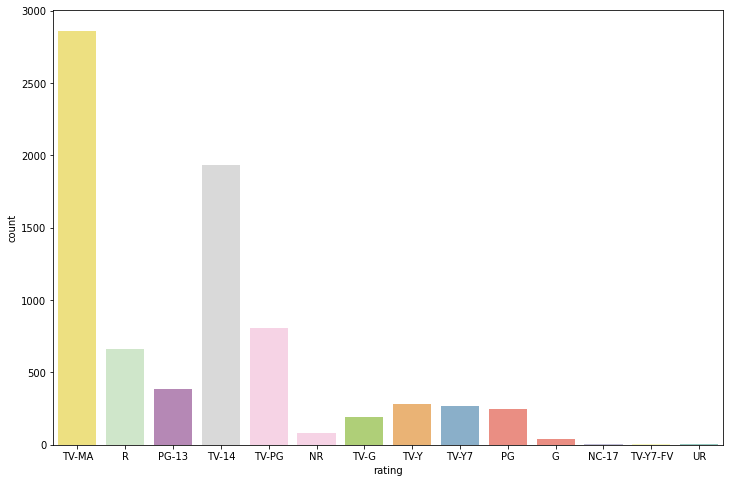

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(x='rating', data=data, palette= 'Set3_r');

In [14]:
data['country'] = data['country'].fillna('Unkown')

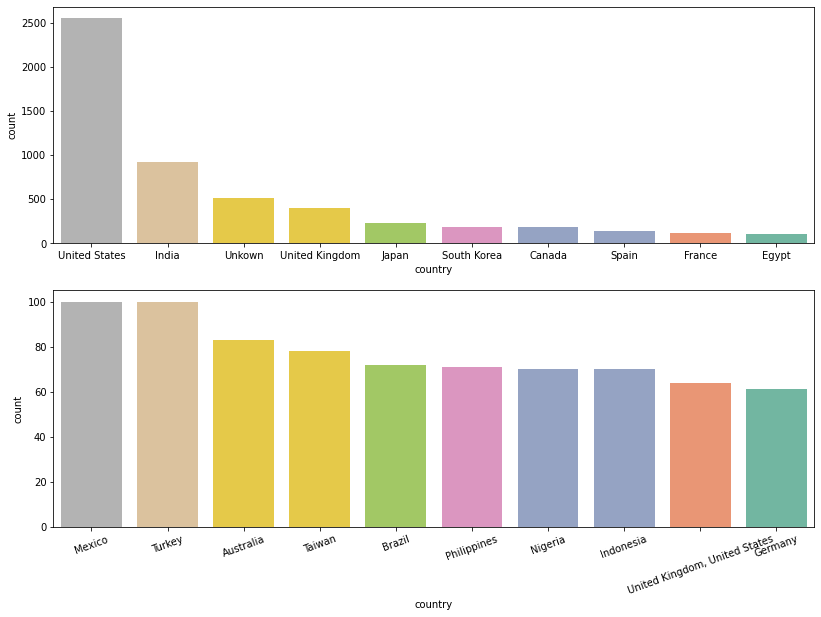

In [15]:
plt.figure(figsize=(30,20))
plt.subplot(4,2,1)
sns.countplot(x='country', data=data, palette= 'Set2_r',order=data['country'].value_counts().index[0:10]);
plt.subplot(4,2,3)
countries = sns.countplot(x='country', data=data, palette= 'Set2_r',order=data['country'].value_counts().index[10:20]);
countries.set_xticklabels(countries.get_xticklabels(),rotation=20);

In [16]:
def generate_word_cloud(text):
    nlp = spacy.load("en_core_web_sm")
    
    stop_words = nlp.Defaults.stop_words
    wordcloud = WordCloud(max_words=1000000,stopwords=stop_words,background_color='white')
    wordcloud.generate(text)
    plt.figure(figsize=(15,7))
    plt.axis('off')
    plt.imshow(wordcloud,interpolation='bilinear')
    
    return plt.show()

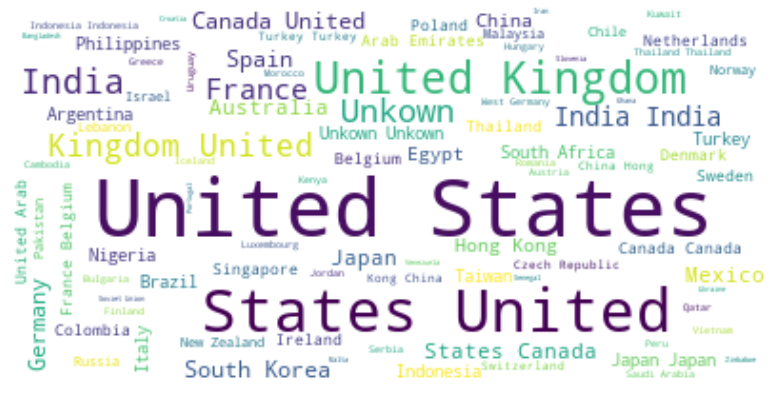

In [17]:
countries = data['country']
countries_txt = ' '.join(word for word in countries.astype(str))
generate_word_cloud(countries_txt)

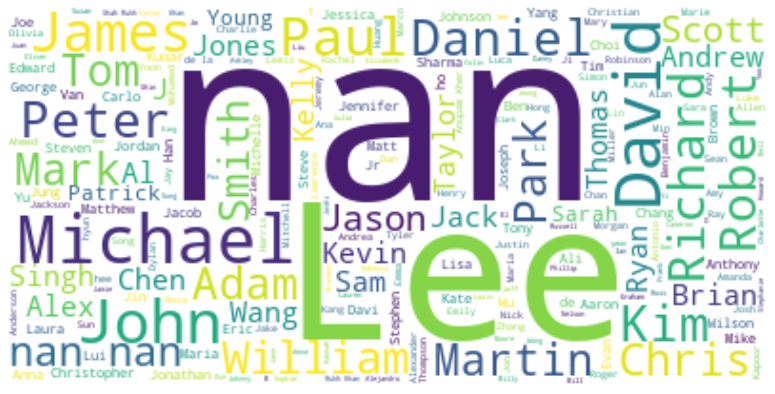

In [18]:
cast = data['cast']
cast_txt = ' '.join(word for word in cast.astype(str))
generate_word_cloud(cast_txt)

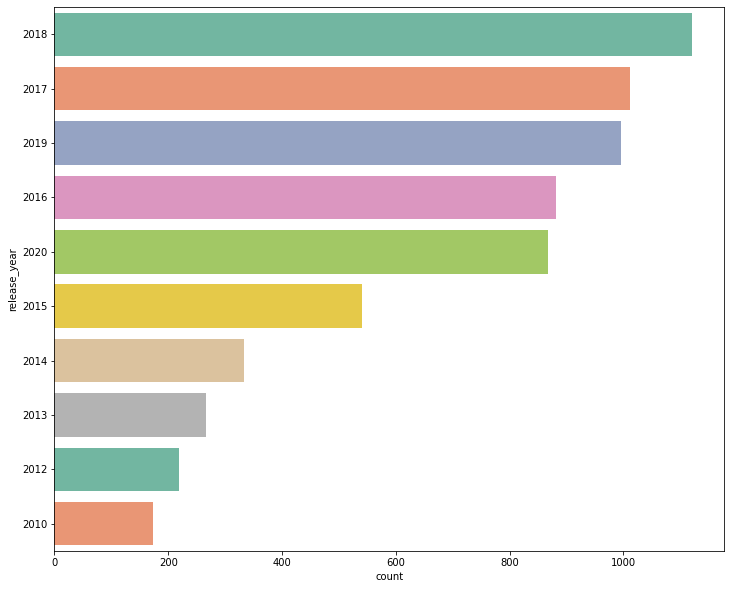

In [19]:
plt.figure(figsize=(12,10))
sns.countplot(y='release_year', data=data, palette='Set2', order=data['release_year'].value_counts().index[:10]);

In [20]:
data['duration'].unique() # season vs minute

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [21]:
tvshow_durations = pd.DataFrame
tvshow_durations = data[data['duration'].str.contains('Seasons')]

movie_durations = pd.DataFrame
movie_durations = data[data['duration'].str.contains('min')]

In [22]:
movie_durations['duration'] = movie_durations['duration'].str.replace(' min','')
movie_durations['duration'] = movie_durations['duration'].astype(int)

tvshow_durations['duration'] = tvshow_durations['duration'].str.replace(' Seasons', '')
tvshow_durations['duration'] = tvshow_durations['duration'].astype(int)

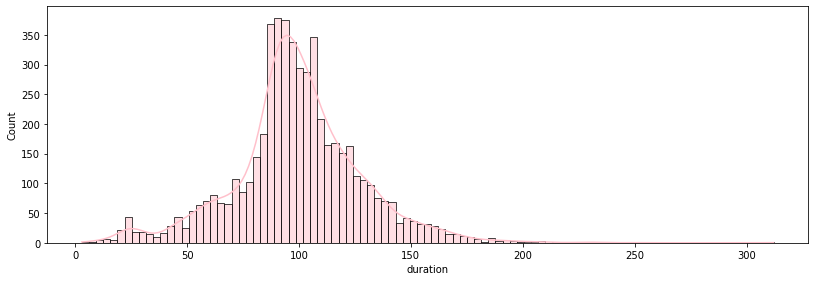

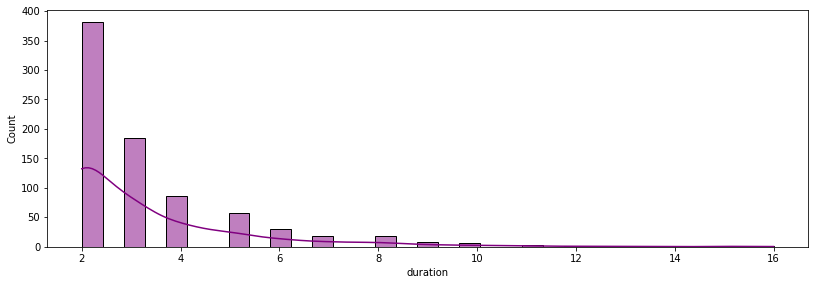

In [23]:
plt.figure(figsize=(30,20))
plt.subplot(4,2,1)
sns.histplot(data= movie_durations['duration'],kde=True, color='pink');

plt.figure(figsize=(30,20))
plt.subplot(4,2,3)
sns.histplot(data= tvshow_durations['duration'],kde=True, color='purple');


In [24]:
genres = list(data['listed_in'])

genre = []

for i in genres:
    i = list(i.split(','))
    
    for j in i:
        genre.append(j.replace(" ",''))
        
genre_count = Counter(genre)
text = list(set(genre))
print(genre_count)

Counter({'InternationalMovies': 2437, 'Dramas': 2106, 'Comedies': 1471, 'InternationalTVShows': 1199, 'Documentaries': 786, 'Action&Adventure': 721, 'TVDramas': 704, 'IndependentMovies': 673, 'Children&FamilyMovies': 532, 'RomanticMovies': 531, 'TVComedies': 525, 'Thrillers': 491, 'CrimeTVShows': 427, "Kids'TV": 414, 'Docuseries': 353, 'RomanticTVShows': 333, 'Stand-UpComedy': 329, 'Music&Musicals': 321, 'HorrorMovies': 312, 'BritishTVShows': 232, 'RealityTV': 222, 'Sci-Fi&Fantasy': 218, 'SportsMovies': 196, 'KoreanTVShows': 150, 'TVAction&Adventure': 150, 'AnimeSeries': 148, 'Spanish-LanguageTVShows': 147, 'ClassicMovies': 103, 'TVMysteries': 90, 'LGBTQMovies': 90, 'Science&NatureTV': 85, 'TVSci-Fi&Fantasy': 76, 'TVHorror': 69, 'TeenTVShows': 60, 'CultMovies': 59, 'Faith&Spirituality': 57, 'AnimeFeatures': 57, 'Movies': 56, 'Stand-UpComedy&TalkShows': 52, 'TVThrillers': 50, 'Classic&CultTV': 27, 'TVShows': 12})


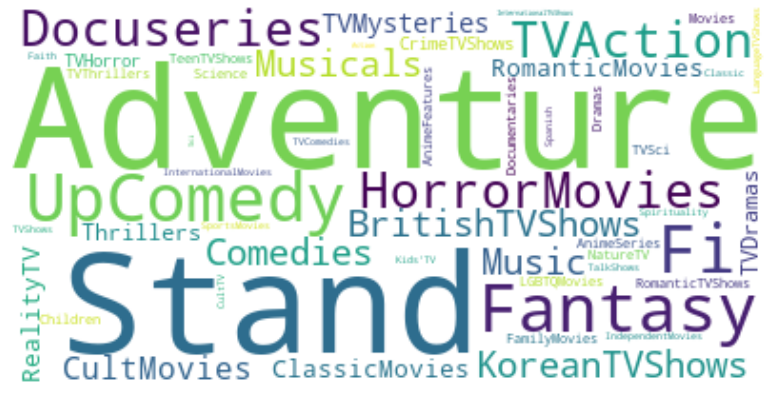

In [25]:
#gen = genre_df['index']
gen_txt = ' '.join(word for word in text)
generate_word_cloud(gen_txt)